# comparing the [DPA Dashboard](https://sf.gov/data/dpa-dashboard) & this complaint data
NOTE: DPA only displays visualizations for the time it was in effect, ie. 2016-present, so OCC records will be ignored for this exploration. They do include running totals for 2023.

[The DPA promotes Mediation training to people interested in volunteering as mediators for them](https://sf.gov/departments/department-police-accountability), and states its goals are to "investigate complaints about police officers and recommend policy changes."

At the bottom of the Dashboard, in the Findings section, the 'Data notes and sources' states:
>"Outcomes
>Allegations are resolved either through mediation or investigation.
>
>In mediation, the person who complained has the opportunity to meet with officers in a neutral setting under the guidance of trained mediators. All sides are given the opportunity to discuss and hear each other's perspectives. Mediation often leads to a mutual understanding and increased satisfaction.
>
>Investigations involve a thorough gathering of evidence and questioning of officers. At the conclusion of an investigation, DPA determines if misconduct occurred and recommends discipline as appropriate. Discipline can range from a written reprimand up to termination and fines. DPA may also recommend admonishments and retraining, which are not considered disciplinary."

In [1]:
# dependencies
import pandas as pd
from plotnine import (
    ggplot,
    aes,
    geom_line,
    geom_label,
    geom_text,
    geom_bar,
    coord_flip,
    theme_classic,
    labs,
    arrow
)

In [2]:
# support methods

In [3]:
# main
full_complaints = pd.read_parquet("../output/complaints.parquet")
clean_complaints = pd.read_parquet("../../clean/output/complaints.parquet")
complaints = clean_complaints.loc[(clean_complaints.year_completed > 2015)].copy()

n_complaints = len(complaints.complaint_id.unique())
n_allegations = len(complaints.allegation_id.unique())
n_sustained = complaints.sustained.sum()
n_mediated = complaints.mediated.sum()

In [4]:
n_complaints

4639

In [5]:
n_allegations

10653

In [6]:
n_sustained

648

In [7]:
n_mediated

393

## garbled dates

In [8]:
complaints.loc[complaints.ttc_group == 'NEGATIVE', ['date_complained', 'date_completed', 'pdf_url']]

date_complained date_completed  \
210        2023-12-12     2023-02-16   
640        2022-12-15     2022-06-05   
641        2022-12-15     2022-06-05   
642        2022-12-15     2022-06-05   
693        2022-04-26     2022-01-10   
...               ...            ...   
10008      2016-06-23     2016-06-06   
10009      2016-06-23     2016-06-06   
10010      2016-06-23     2016-06-06   
10389      2016-10-02     2016-09-23   
10390      2016-10-02     2016-09-23   

                                                 pdf_url  
210    https://sf.gov/sites/default/files/2023-03/Ope...  
640    https://sf.gov/sites/default/files/2023-07/Jun...  
641    https://sf.gov/sites/default/files/2023-07/Jun...  
642    https://sf.gov/sites/default/files/2023-07/Jun...  
693    https://sf.gov/sites/default/files/2022-04/DPA...  
...                                                  ...  
10008  https://wayback.archive-it.org/org-571/2023012...  
10009  https://wayback.archive-it.org/org-571/2023012...  
10010  https://wayback.archive-it.org/org-571/2023012...  
10389  https://wayback.archive-it.org/org-571/2023012...  
10390  https://wayback.archive-it.org/org-571/2023012...  

[176 rows x 3 columns]

# Cases

## cumulative cases opened by year
Reference DPA plot:
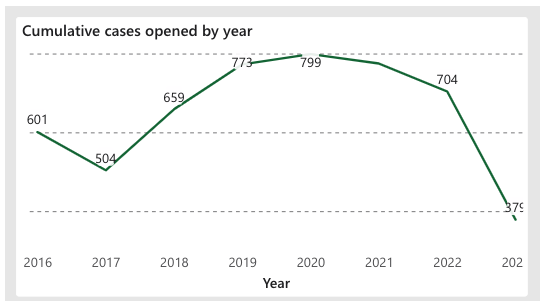

In [9]:
dpa_open = {
    2016: 601,
    2017: 504,
    2018: 659,
    2019: 773,
    2020: 799,
    2021: 775,
    2022: 704,
    2023: 379,
}

In [10]:
less = complaints[['complaint_id', 'year_complained']].copy().drop_duplicates()
less.rename(columns={'complaint_id': 'id_count'}, inplace=True)
df = less.groupby('year_complained').count().reset_index()

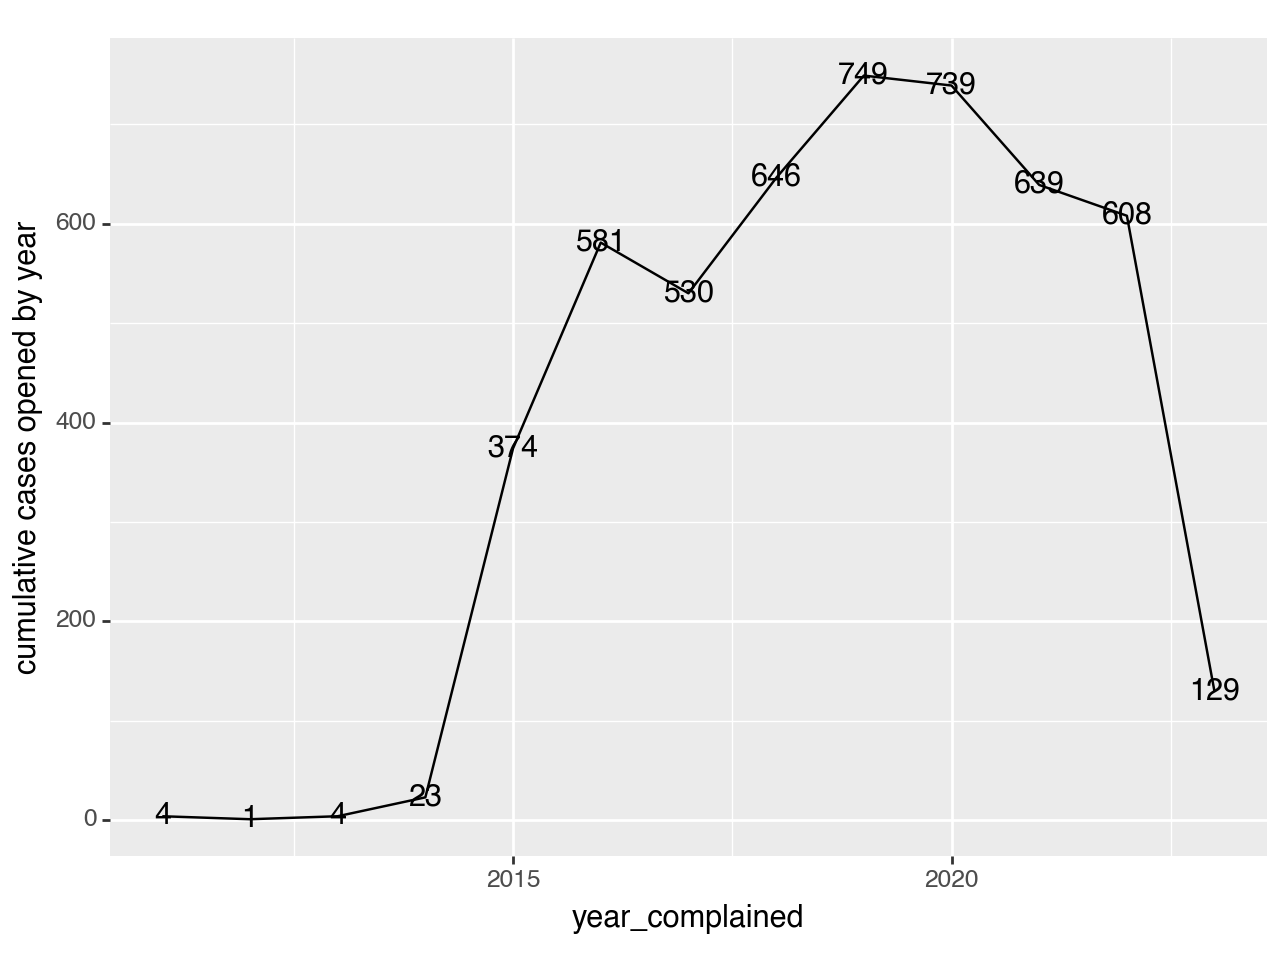

<Figure Size: (640 x 480)>

In [11]:
(
    ggplot(df, aes(x='year_complained', y='id_count', label='id_count'))
    + geom_line()
    + geom_text()
    + labs(x='year_complained', y='cumulative cases opened by year')
)

In [12]:
for year,dpa_count in dpa_open.items():
    data_n = len(complaints.loc[complaints.year_complained == year, 'complaint_id'].unique())
    if data_n > dpa_count: print(f'--- WARNING: DPA data shows {dpa_count} records for {year}, our data shows {data_n} ---')
    else: print(f'Our data shows {dpa_count-data_n} fewer records than DPA {year}')

Our data shows 20 fewer records than DPA 2016
--- WARNING: DPA data shows 504 records for 2017, our data shows 530 ---
Our data shows 13 fewer records than DPA 2018
Our data shows 24 fewer records than DPA 2019
Our data shows 60 fewer records than DPA 2020
Our data shows 136 fewer records than DPA 2021
Our data shows 96 fewer records than DPA 2022
Our data shows 250 fewer records than DPA 2023


## cumulative cases closed by year
Reference DPA plot: 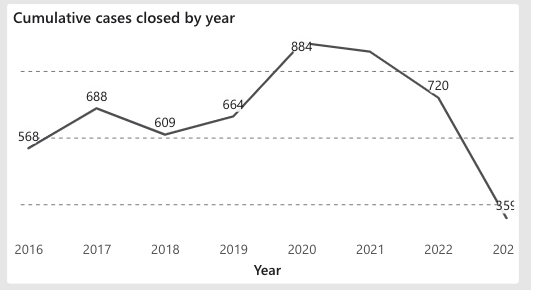

In [13]:
dpa_clos = {
    2016: 568,
    2017: 688,
    2018: 609,
    2019: 664,
    2020: 884,
    2021: 858,
    2022: 720,
    2023: 359,
}

In [14]:
less = complaints[['complaint_id', 'year_completed']].copy().drop_duplicates()
less.rename(columns={'complaint_id': 'id_count'}, inplace=True)
df = less.groupby('year_completed').count().reset_index()

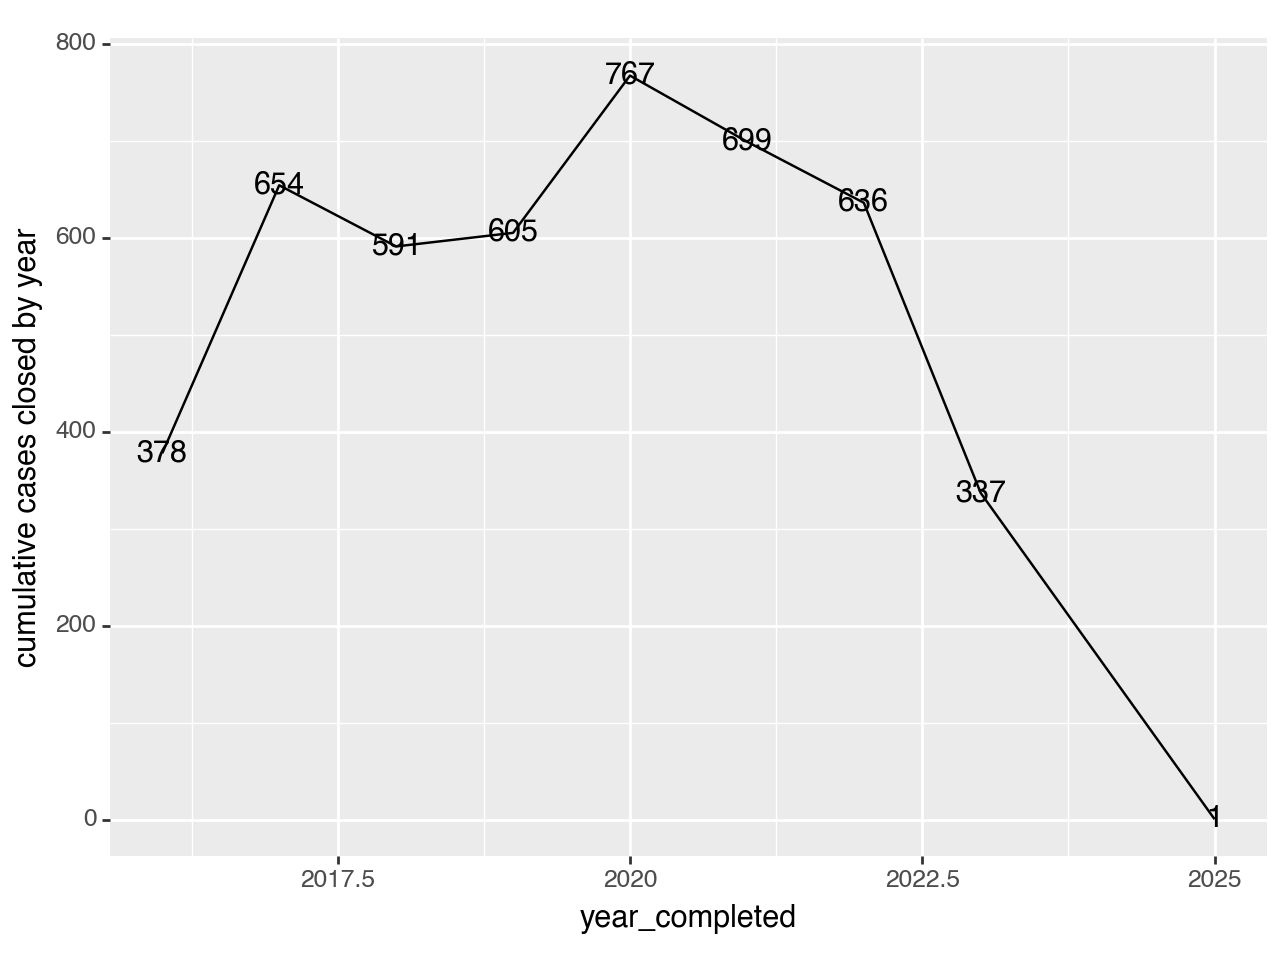

<Figure Size: (640 x 480)>

In [15]:
(
    ggplot(df, aes(x='year_completed', y='id_count', label='id_count'))
    + geom_line()
    + geom_text()
    + labs(x='year_completed', y='cumulative cases closed by year')
)

In [16]:
for year,dpa_count in dpa_clos.items():
    data_n = len(complaints.loc[complaints.year_completed == year, 'complaint_id'].unique())
    if data_n > dpa_count: print(f'--- WARNING: DPA data shows {dpa_count} records for {year}, our data shows {data_n} ---')
    else: print(f'Our data shows {dpa_count-data_n} fewer records than DPA {year}')

Our data shows 190 fewer records than DPA 2016
Our data shows 34 fewer records than DPA 2017
Our data shows 18 fewer records than DPA 2018
Our data shows 59 fewer records than DPA 2019
Our data shows 117 fewer records than DPA 2020
Our data shows 159 fewer records than DPA 2021
Our data shows 84 fewer records than DPA 2022
Our data shows 22 fewer records than DPA 2023


## cumulative cases sustained by year complained
Reference DPA plot: 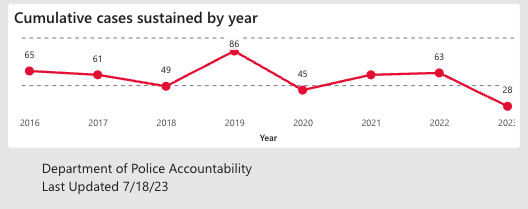

In [17]:
dpa_sust = {
    2016: 65,
    2017: 61,
    2018: 49,
    2019: 86,
    2020: 45,
    2021: 61,
    2022: 63,
    2023: 28,
}

In [18]:
sustained = complaints.loc[complaints.sustained == 1, 
    ['complaint_id', 'year_complained']].copy().drop_duplicates()
sustained.rename(columns={'complaint_id': 'id_count'}, inplace=True)
df = sustained.groupby('year_complained').count().reset_index()

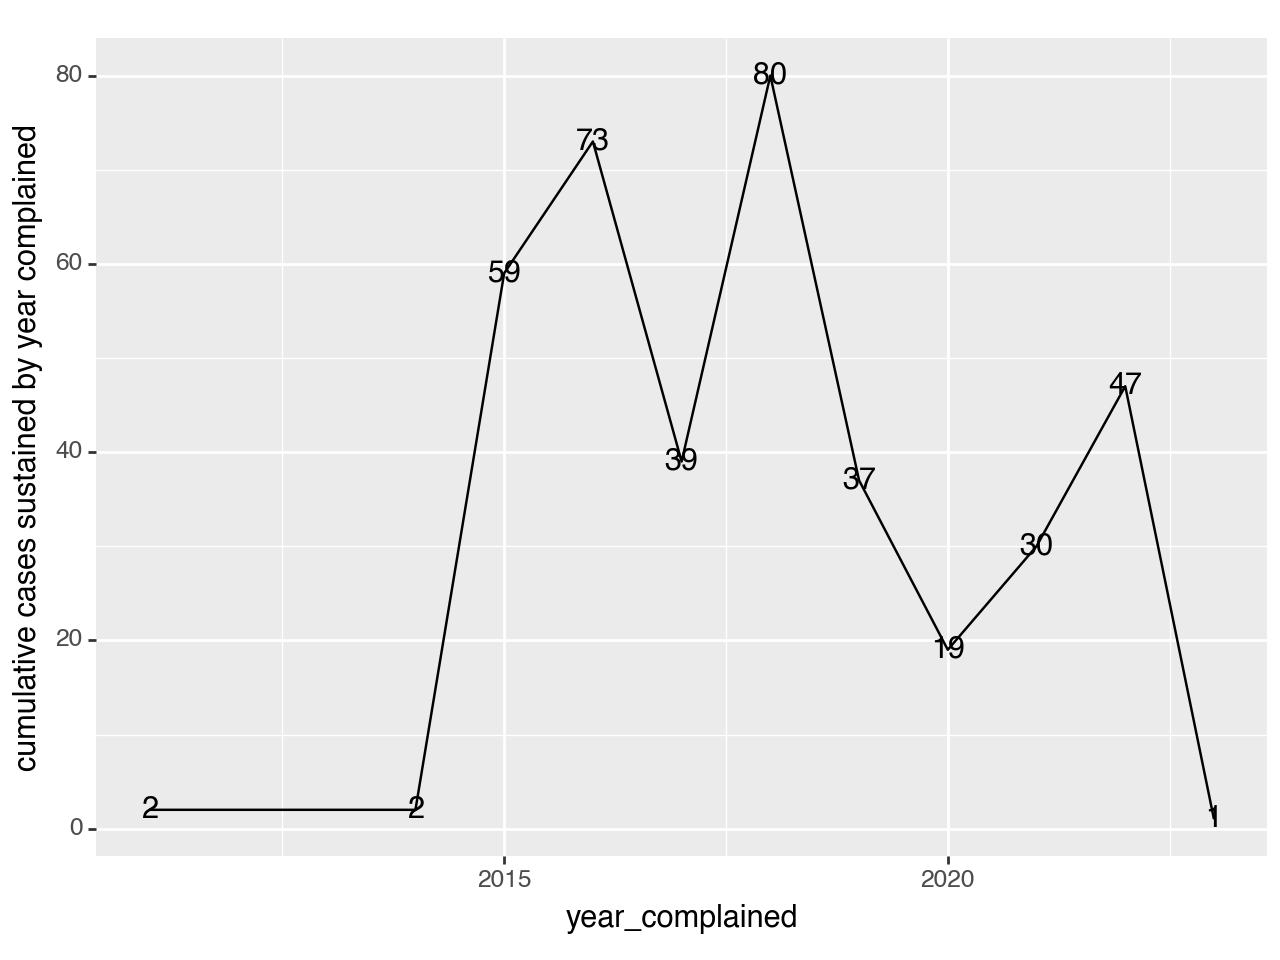

<Figure Size: (640 x 480)>

In [19]:
(
    ggplot(df, aes(x='year_complained', y='id_count', label='id_count'))
    + geom_line()
    + geom_text()
    + labs(x='year_complained', y='cumulative cases sustained by year complained')
)

In [20]:
for year,dpa_count in dpa_sust.items():
    data_n = len(complaints.loc[(complaints.year_complained == year) & (complaints.sustained), 'complaint_id'].unique())
    if data_n > dpa_count: print(f'--- WARNING: DPA data shows {dpa_count} records for {year}, our data shows {data_n} ---')
    else: print(f'Our data shows {dpa_count-data_n} fewer records than DPA {year}')

--- WARNING: DPA data shows 65 records for 2016, our data shows 73 ---
Our data shows 22 fewer records than DPA 2017
--- WARNING: DPA data shows 49 records for 2018, our data shows 80 ---
Our data shows 49 fewer records than DPA 2019
Our data shows 26 fewer records than DPA 2020
Our data shows 31 fewer records than DPA 2021
Our data shows 16 fewer records than DPA 2022
Our data shows 27 fewer records than DPA 2023


## cumulative cases sustained by year completed

In [21]:
sustained = complaints.loc[complaints.sustained, 
    ['complaint_id', 'year_completed']].copy().drop_duplicates()
sustained.rename(columns={'complaint_id': 'id_count'}, inplace=True)
df = sustained.groupby('year_completed').count().reset_index()

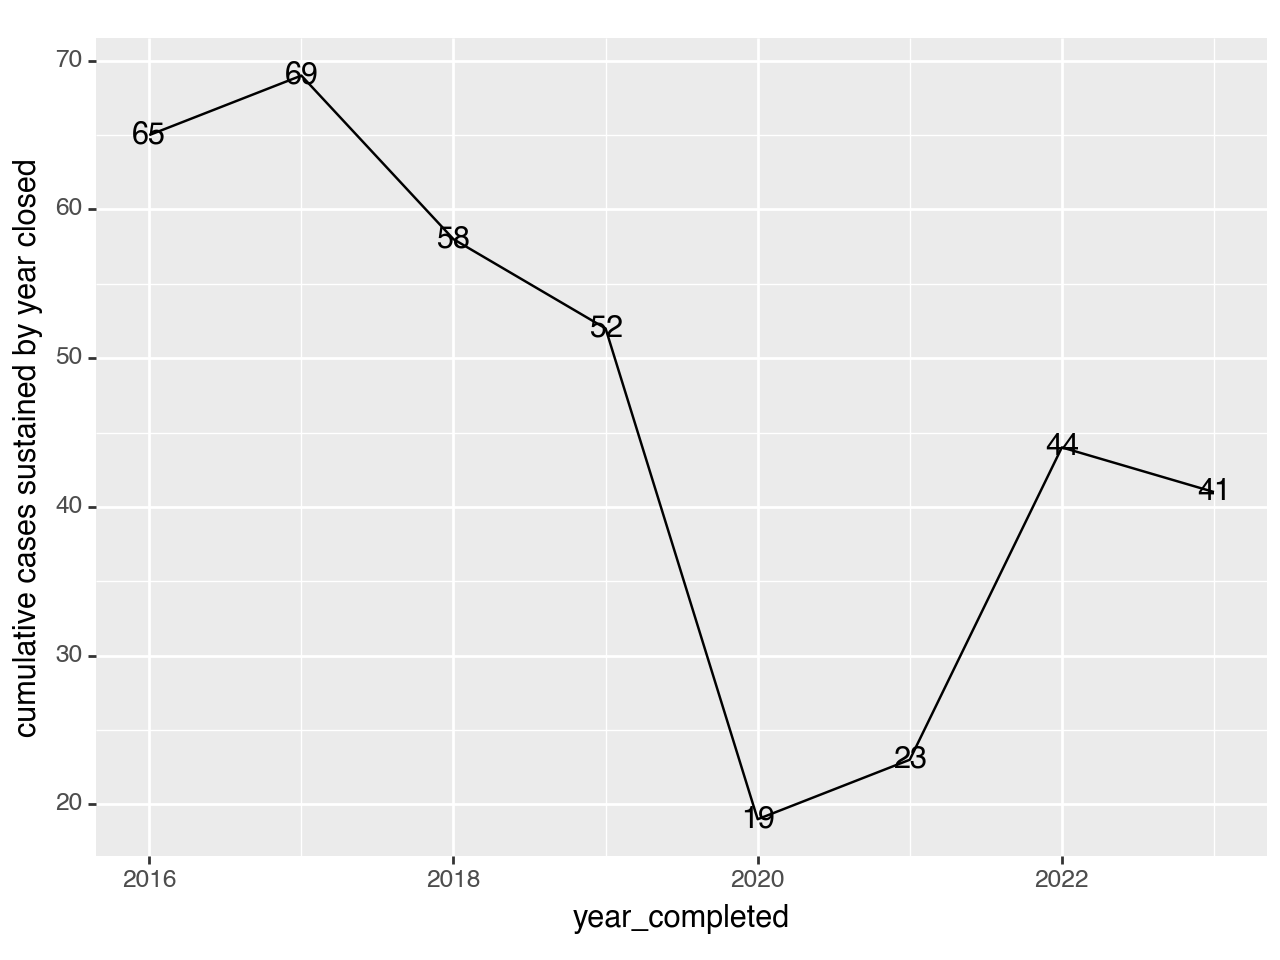

<Figure Size: (640 x 480)>

In [22]:
(
    ggplot(df, aes(x='year_completed', y='id_count', label='id_count'))
    + geom_line()
    + geom_text()
    + labs(x='year_completed', y='cumulative cases sustained by year closed')
)

In [23]:
for year,dpa_count in dpa_sust.items():
    data_n = len(complaints.loc[(complaints.year_completed == year) & (complaints.sustained), 'complaint_id'].unique())
    if data_n > dpa_count: print(f'--- WARNING: DPA data shows {dpa_count} records for {year}, our data shows {data_n} ---')
    else: print(f'Our data shows {dpa_count-data_n} fewer records than DPA {year}')

Our data shows 0 fewer records than DPA 2016
--- WARNING: DPA data shows 61 records for 2017, our data shows 69 ---
--- WARNING: DPA data shows 49 records for 2018, our data shows 58 ---
Our data shows 34 fewer records than DPA 2019
Our data shows 26 fewer records than DPA 2020
Our data shows 38 fewer records than DPA 2021
Our data shows 19 fewer records than DPA 2022
--- WARNING: DPA data shows 28 records for 2023, our data shows 41 ---


# Allegations

In [24]:
complaints.category_of_conduct.value_counts()

category_of_conduct
ND                                  3347
UA                                  2210
CRD                                 1442
CUO                                 1138
UF                                   605
NA                                   599
D                                    126
CU                                    32
SS                                    19
Neglect of Duty                       17
RS                                    17
Conduct Unbecoming an Officer          8
PP                                     7
POL                                    5
COU                                    4
Unwarranted Action                     4
Policy                                 2
Conduct Unbecoming of an Officer       2
Referral                               2
PPC                                    1
UOF                                    1
PF                                     1
CU O                                   1
U                                    

In [25]:
# core 7
complaints['neglect_of_duty'] = complaints.category_of_conduct.isin(("ND", "Neglect of Duty",))
complaints['conduct_unbecoming'] = complaints.category_of_conduct.isin(("CUO", "CU", "COU", "CO U", "Conduct Unbecoming an Officer",))
complaints['unwarranted_action'] = complaints.category_of_conduct.isin(("UA", "Unwarranted Action",))
complaints['unnecessary_force'] = complaints.category_of_conduct.isin(("UF", "Unnecessary Force",))
complaints['discourtesy'] = complaints.category_of_conduct.isin(("D", "Discourtesy",))
complaints['sexual_slur'] = complaints.category_of_conduct.isin(("SS", "Sexual Slur",))
complaints['racial_slur'] = complaints.category_of_conduct.isin(("RS", "Racial Slur",))

# supplementary
complaints['policy_procedure'] = complaints.category_of_conduct.isin(("PP", "POL", "Policy", "PPC", "Policy and Procedure",))

In [26]:
complaints['referral'] = (complaints.finding.str.lower().str.contains("referral")) | (complaints.category_of_conduct.str.contains('Referral'))

In [60]:
# 'inattention to duty', 'misconduct', 'informational' shown on the website but not seen data
# 'crd' appears in the data as a `category_of_conduct` code (which seems to be the `allegation_type` depicted) but unclear meaning
dash_set_cat = ['allegation_id', 'year_complained', 
                'neglect_of_duty', 'conduct_unbecoming', 
                'unwarranted_action', 'unnecessary_force', 
                'referral', 'discourtesy', 'policy_procedure', 'sexual_slur', 'racial_slur']

In [61]:
complaints[dash_set_cat]

allegation_id  year_complained  neglect_of_duty  conduct_unbecoming  \
0      3fc08c79f1237856           2021.0            False               False   
1      b81e56beabebd334           2021.0            False               False   
2      d037df7b46dc738d           2021.0            False               False   
3      555e30a9a6354014           2021.0            False                True   
4      7b7260363e694781           2021.0            False                True   
...                 ...              ...              ...                 ...   
10807  1f1f754e683ffc5e           2015.0             True               False   
10808  b79af6f1e6e787ec           2015.0             True               False   
10809  ff545c9cb0255f00           2015.0            False               False   
10810  77bde29a2cfc1f77           2015.0            False               False   
10811  f82b62983c816d5d           2015.0            False               False   

       unwarranted_action  unnecessary_force  referral  discourtesy  \
0                    True              False     False        False   
1                   False               True     False        False   
2                    True              False     False        False   
3                   False              False     False        False   
4                   False              False     False        False   
...                   ...                ...       ...          ...   
10807               False              False     False        False   
10808               False              False     False        False   
10809               False              False     False        False   
10810               False              False     False        False   
10811               False               True     False        False   

       policy_procedure  sexual_slur  racial_slur  
0                 False        False        False  
1                 False        False        False  
2                 False        False        False  
3                 False        False        False  
4                 False        False        False  
...                 ...          ...          ...  
10807             False        False        False  
10808             False        False        False  
10809             False        False        False  
10810             False        False        False  
10811             False        False        False  

[10653 rows x 11 columns]

In [ ]:
report_rates = complaints[dash_set_cat].groupby(
    ['allegation_id', 'year_complained']).sum().reset_index()
for col in dash_set_cat:
    if col in ('allegation_id', 'year_complained'):
        continue
    report_rates[col] = report_rates[col] / report_rates.shape[0]
report_rates = report_rates[['year_occurred', 
                             'city_district_occurred', 
                             'arrival', 
                             'notification', 
                             'closure']]

In [56]:
cat_df = pd.DataFrame(complaints[dash_set_cat].sum()).reset_index()
cat_df.rename(columns={'index': 'allegation_type', 0: 'allegation_count'}, inplace=True)

In [57]:
cat_df

allegation_type  allegation_count
0     neglect_of_duty              3364
1  conduct_unbecoming              1182
2  unwarranted_action              2214
3   unnecessary_force               605
4            referral                22
5         discourtesy               126
6    policy_procedure                15
7         sexual_slur                19
8         racial_slur                17

/opt/homebrew/Caskroom/miniforge/base/lib/python3.11/site-packages/plotnine/stats/stat_count.py:70: FutureWarning: The provided callable <function sum at 0x111ada340> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.


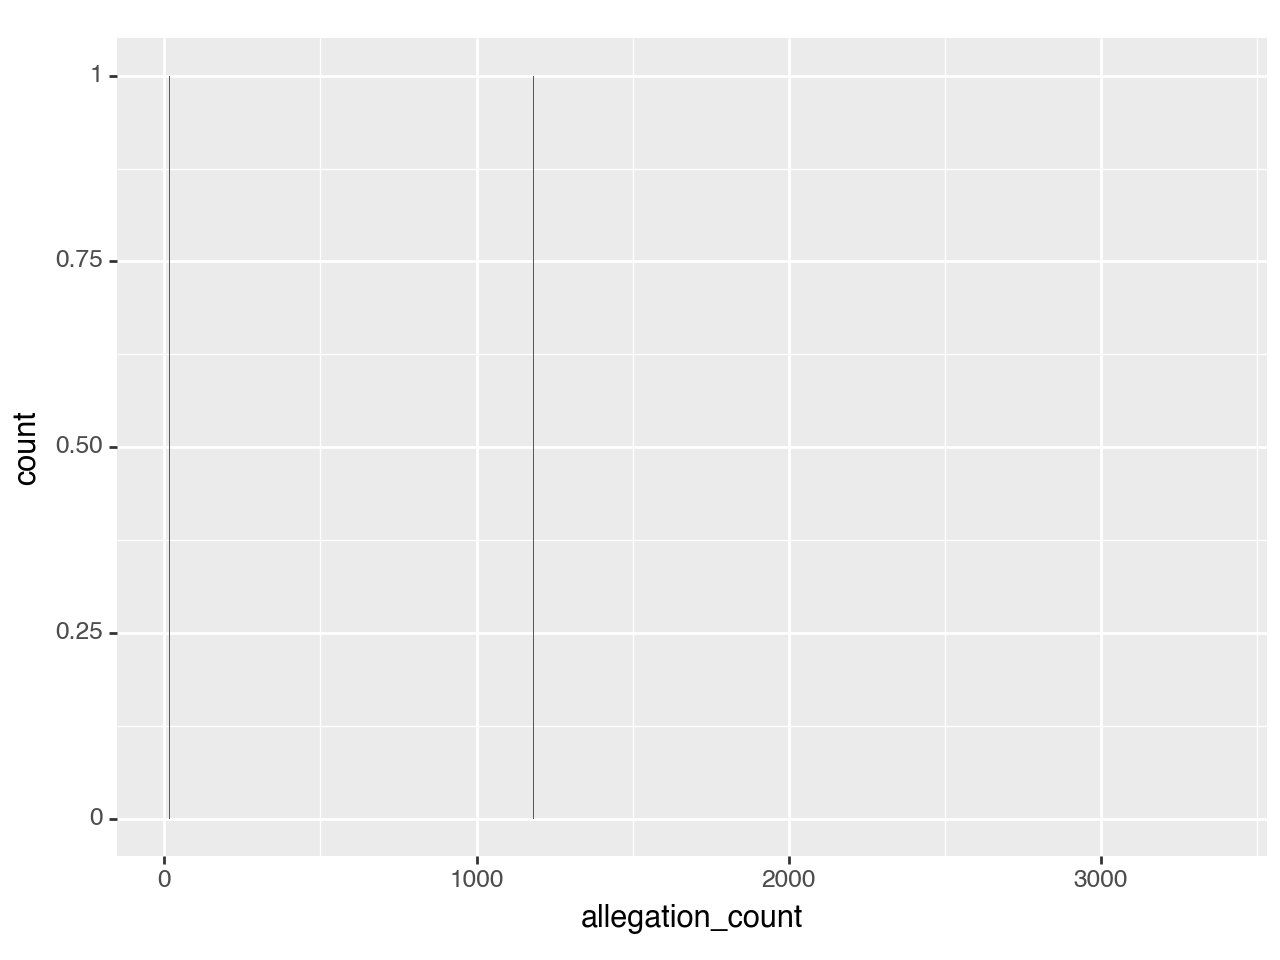

<Figure Size: (640 x 480)>

In [58]:
(
    ggplot(cat_df)
    + geom_bar(aes(x='allegation_count'))
    #+ coord_flip()
)

In [30]:
complaints['no_finding'] = complaints.finding.isin(("NF", "No Finding",))
complaints['unfounded'] = complaints.finding.isin(("U", "Unfounded",))
complaints['insufficient_evidence'] = complaints.finding.isin(("IE", "Insufficient Evidence",))
complaints['proper_conduct'] = complaints.finding.isin(("PC", "Proper Conduct",))
complaints['improper_conduct'] = complaints.finding.isin(("IC", "ICS", "IC/S", "IC(S)", "S/IC", "IC (Sustained)", "Improper Conduct",))
complaints['policy_failure'] = complaints.finding.isin(("PF", "Policy Failure",))
complaints['supervision_training_failure'] = complaints.finding.isin(("SF", "TF", "Supervision Failure", "Training Failure",))

In [31]:
# 'informational' is shown on the website but doesn't seem to appear in the data
dash_set_find = ['allegation_id', 'year_complained', 
                'no_finding', 'unfounded', 'insufficient_evidence', 
                 'proper_conduct', 'improper_conduct', 
                 'policy_failure', 'supervision_training_failure', 
                 'referral', 'withdrawn', 'mediated']

In [32]:
find_df = pd.DataFrame(complaints[dash_set_find].sum()).reset_index()
find_df.rename(columns={'index': 'allegation_type', '0': 'allegation_count'}, inplace=True)

In [33]:
(
    ggplot(find_df)
    + geom_bar(aes(x='allegation_count'))
    + coord_flip()
    + theme_classic()
)

PlotnineError: "Could not evaluate the 'x' mapping: 'allegation_count' (original error: name 'allegation_count' is not defined)"